# Basic imports, functions from previous PS and boundary conditions:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Reward function, given in the prompt:

In [2]:
def reward(x, N, c):
  return -(x/N)**2 - c

Policy Evaluation via Power Iteration Algorithm:

In [14]:
def compute_value(N, gamma, policy_vector, iterations):
   
  # Initiate Policy Value Vector with zeros:
  policy_value = np.zeros((N))

  for iteration in range(iterations):
    for state in range(N):
      if policy_vector[state] == "high": # this is the action the policy suggests to take at state x
        q = 0.6 # probability of serving one client
        c = 0.01 # impact on the reward function of taking the action
      else: # suggested action would be "low"
        q = 0.51 
        c = 0 

      if state == 0: #only possible change is for the queue to go up by one
        p_increase = 0.5 * (1 - q)
        p_no_change = 0.5 * (1 + q)
        p_decrease = 0
      
        value = reward(state, N, c) + gamma * (p_increase * policy_value[state + 1] + p_no_change * policy_value[state]) # immediate expected reward + discounted reward

      elif state == N-1: #only possible change is for the queue to go down by one
        p_increase = 0
        p_no_change = 1 - 0.5 * q
        p_decrease = 0.5 * q 
        
        value = reward(state, N, c) + gamma * (p_no_change * policy_value[state] + p_decrease * policy_value[state - 1]) # immediate expected reward + discounted reward

      else: 
        p_increase = 0.5 * (1 - q)
        p_no_change = 0.5
        p_decrease = 0.5 * q

        value = reward(state, N, c) + gamma * (p_increase * policy_value[state + 1] + p_no_change * policy_value[state] + p_decrease * policy_value[state - 1]) # immediate reward expected reward + discounted reward

      
      # update the policy value for any of the 3 cases:
      policy_value[state] = value
    
    # alternatively we could update whole vector here (instead of updating single entries of the vector as we compute them). This should be slower.
  
  return policy_value

# tests to see it works:
#compute_value(100, 0.9, lazy_policy, 1000)
#compute_value(100, 0.9, aggr_policy, 1000)

Policy iteration algorithm:

In [39]:
def policy_iteration(N, iterations_for_policy_iteration, gamma, P, iterations_for_power_iteration):
  V = np.zeros(N)
  reward_mat = reward_matrix(N)

  for iteration in range(iterations_for_policy_iteration):
    V_next = - np.inf * np.ones(N)
    Q_estimate = np.zeros((N, 2))
    pi_greedy = np.zeros((N, 2))

    for state in range(N):
      for action in range(2):
        Q_estimate[state, action] = reward_mat[state, action] + gamma * P[action, state, :].dot(V)
        if Q_estimate[state, action] > V_next[state]:
          V_next[state] = Q_estimate[state, action]
          pi_greedy[state, :] = np.zeros(2)
          pi_greedy[state, action] = 1

    policy_vector = []
    for state in range(len(pi_greedy[:,0])):
      if pi_greedy[state, 0] == 1:
        policy_vector.append("low")
      else: policy_vector.append("high")

    V = compute_value(N, gamma, policy_vector, iterations_for_power_iteration)
  
  return V, policy_vector

# tests to see it works:
#policy_iteration(100, 100, 0.9, P, 100)


Rewards in a matricial form:

In [30]:
def reward_matrix(N):
  # this generates a matrix that stacks the reward vectors associates with each action
  reward_matrix = np.zeros((N, 2))
  reward_matrix[:,0] = [-(x/N)**2 for x in range(N)]
  reward_matrix[:,1] = [(-(x/N)**2 - 0.01) for x in range(N)]
  
  return reward_matrix

# tests to see it works:
reward_matrix(100)

array([[-0.000e+00, -1.000e-02],
       [-1.000e-04, -1.010e-02],
       [-4.000e-04, -1.040e-02],
       [-9.000e-04, -1.090e-02],
       [-1.600e-03, -1.160e-02],
       [-2.500e-03, -1.250e-02],
       [-3.600e-03, -1.360e-02],
       [-4.900e-03, -1.490e-02],
       [-6.400e-03, -1.640e-02],
       [-8.100e-03, -1.810e-02],
       [-1.000e-02, -2.000e-02],
       [-1.210e-02, -2.210e-02],
       [-1.440e-02, -2.440e-02],
       [-1.690e-02, -2.690e-02],
       [-1.960e-02, -2.960e-02],
       [-2.250e-02, -3.250e-02],
       [-2.560e-02, -3.560e-02],
       [-2.890e-02, -3.890e-02],
       [-3.240e-02, -4.240e-02],
       [-3.610e-02, -4.610e-02],
       [-4.000e-02, -5.000e-02],
       [-4.410e-02, -5.410e-02],
       [-4.840e-02, -5.840e-02],
       [-5.290e-02, -6.290e-02],
       [-5.760e-02, -6.760e-02],
       [-6.250e-02, -7.250e-02],
       [-6.760e-02, -7.760e-02],
       [-7.290e-02, -8.290e-02],
       [-7.840e-02, -8.840e-02],
       [-8.410e-02, -9.410e-02],
       [-9

Function for offseting actions for later plotting:

In [36]:
def plotable(policy, num):
  return [1 + num if action == "high" else num for action in policy]

Transition matrix:

In [42]:
def transition_matrix_2(policy_vector):
  # this generates an X by X matrix with the probabilities of changing from one state into another, from a policy vector of the form ["high", "low", ...]
  N = len(policy_vector)
  matrix = np.zeros((N,N))

  for state in range(N):
    if policy_vector[state] == "high":
      q = 0.6 # probability of successfully serving 1 client
    else: 
      q = 0.51

    if state == 0: #only possible change is for the queue to go up by one
      p_increase = 0.5 * (1 - q)
      p_no_change = 0.5 * (1 + q)
      p_decrease = 0
    
      matrix[state, state] = p_no_change
      matrix[state, state + 1] = p_increase

    elif state == N-1: #only possible change is for the queue to go down by one
      p_increase = 0
      p_no_change = 1 - 0.5 * q
      p_decrease = 0.5 * q 
      
      matrix[state, state] = p_no_change
      matrix[state, state - 1] = p_decrease

    else: 
      p_increase = 0.5 * (1 - q)
      p_no_change = 0.5
      p_decrease = 0.5 * q

      matrix[state, state + 1] = p_increase
      matrix[state, state] = p_no_change
      matrix[state, state - 1] = p_decrease

  return matrix

# tests to see it works:
#policy_vector = ["low"] * 100
#transition_matrix_2(policy_vector)

We generate a tensor that stacks the two transitions matrices. Note the dimensions of this object are A * X * X

In [43]:
policy_vector = ["low"] * 100
a = transition_matrix_2(policy_vector)
policy_vector = ["high"] * 100
b = transition_matrix_2(policy_vector)
P = np.stack((a,b))

# HW2

## Problem 1:

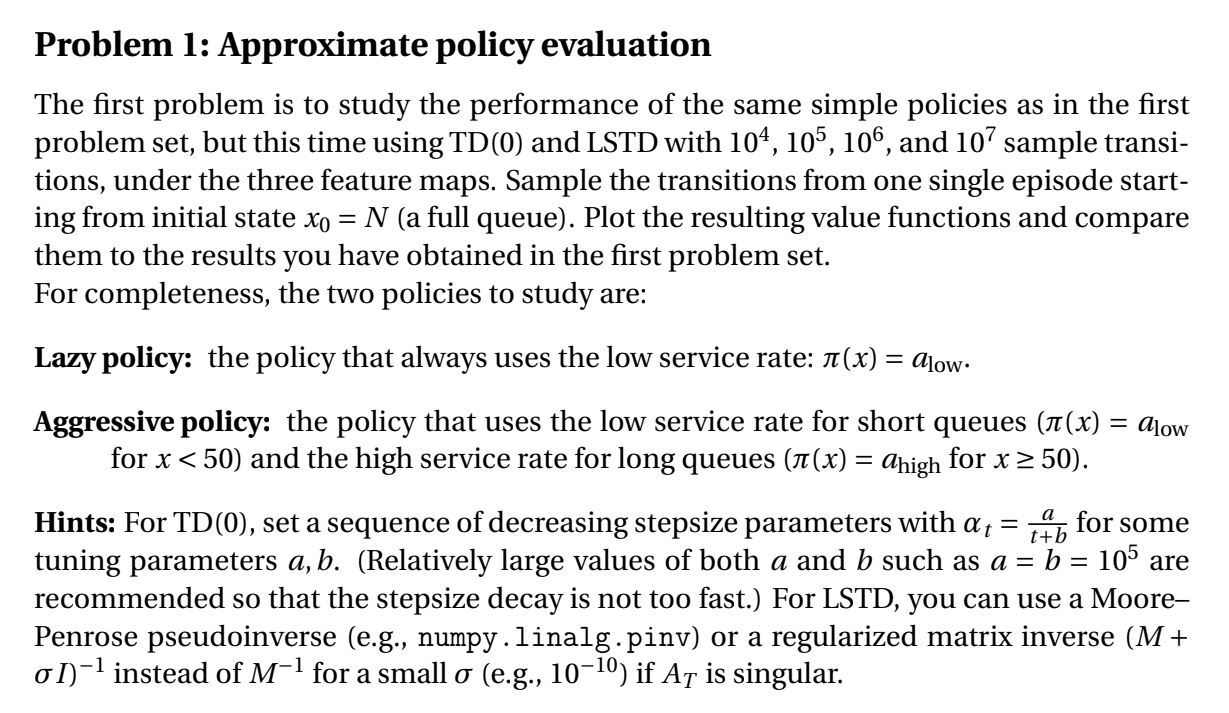

### Feature maps:


In [3]:
# Fine FM
def fine(N, state):
  fm = np.zeros(N)
  index = state
  fm[index] = 1
  return fm

fine(10, 1)

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [4]:
import math
def coarse(N, state):
  fm = np.zeros(int(N/5))
  index = math.floor(state / 5)
  fm[index] = 1
  return fm
coarse(20, 16)

array([0., 0., 0., 1.])

In [5]:
def pwl(N, state):
  fm = np.zeros(int(2 * N / 5))
  # first half of the entries:
  index = math.floor(state / 5)
  fm[index] = 1
  # second half of the entries:
  index_2 = int(index + N / 5)
  fm[index_2] = (state - 5 * (index)) / 5
  return fm

pwl(100, 6)[20:]
#len(pwl(100, 6)[20:])

array([0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. ])

### Policies:

In [6]:
lazy_policy = np.zeros(100)
aggr_policy = np.concatenate((np.zeros(50), np.ones(50)))
aggr_policy

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### Functions:

In [7]:
def transition_matrix(policy_vector):
  # policy_vector: vector of 0s and 1s, with 0 = low rate and 1 = high rate

  # this generates an X by X matrix with the probabilities of changing from one state into another, from a policy vector of the form ["high", "low", ...]
  N = len(policy_vector)
  matrix = np.zeros((N,N))

  for state in range(N):
    if int(policy_vector[state]) == 1:
      q = 0.6 # probability of successfully serving 1 client
    else: 
      q = 0.51

    if state == 0: #only possible change is for the queue to go up by one
      p_increase = 0.5 * (1 - q)
      p_no_change = 0.5 * (1 + q)
      p_decrease = 0
    
      matrix[state, state] = p_no_change
      matrix[state, state + 1] = p_increase

    elif state == N-1: #only possible change is for the queue to go down by one
      p_increase = 0
      p_no_change = 1 - 0.5 * q
      p_decrease = 0.5 * q 
      
      matrix[state, state] = p_no_change
      matrix[state, state - 1] = p_decrease

    else: 
      p_increase = 0.5 * (1 - q)
      p_no_change = 0.5
      p_decrease = 0.5 * q

      matrix[state, state + 1] = p_increase
      matrix[state, state] = p_no_change
      matrix[state, state - 1] = p_decrease

  return matrix

In [8]:
def run_episode(policy_vector, num_transitions):
  # this simulates one episode, returns the list of rewards and states seen
  x = 99
  N = 100
  P = transition_matrix(policy_vector)
  states = [x]
  rewards = []
  
  for t in range(num_transitions):
    # see the reward:
    if policy_vector[x] == 1:
      c = 0.01
    else: c = 0

    r = reward(x, N, c)
    x = np.random.choice(list(range(100)), p = P[x, :])
    
    rewards.append(r)
    states.append(x)

  return rewards, states

In [10]:
def TD_0(rewards_list, states_list, lfa, a = 10**5, b = 10**5, gamma = 0.9):
  dim = 100
  value_vector = np.zeros(dim)

  if lfa == "fine":
    #initialize theta in a random manner:
    theta = np.zeros(dim)
    for t in range(len(states_list)-1):
      TD = rewards_list[t] + gamma * np.dot(theta, fine(dim, states_list[t+1])) - np.dot(theta, fine(dim, states_list[t]))
      theta = theta + (a / (b + t)) * TD * fine(dim, states_list[t])
  
    for state in range(dim):
      value_vector[state] = np.dot(theta, fine(dim, state))

  elif lfa == "coarse":
    #initialize theta in a random manner:
    theta = np.zeros(int(dim/5))
    for t in range(len(states_list)-1):
      TD = rewards_list[t] + gamma * np.dot(theta, coarse(dim, states_list[t+1])) - np.dot(theta, coarse(dim, states_list[t]))
      theta = theta + (a / (b + t)) * TD * coarse(dim, states_list[t])
  
    for state in range(dim):
      value_vector[state] = np.dot(theta, coarse(dim, state))

  elif lfa == "pwl":
    #initialize theta in a random manner:
    theta = np.zeros(int(dim * 2 / 5))
    for t in range(len(states_list)-1):
      TD = rewards_list[t] + gamma * np.dot(theta.T, pwl(dim, states_list[t+1])) - np.matmul(theta.T, pwl(dim, states_list[t]))
      theta = theta + (a / (b + t)) * TD * pwl(dim, states_list[t])

    for state in range(dim):
      value_vector[state] = np.dot(theta, pwl(dim, state))
  
  return value_vector

In [11]:
def LSTD(rewards_list, states_list, lfa, gamma = 0.9):
  dim = 100
  value_vector = np.zeros(dim)
  b = 0
  AB = 0

  if lfa == "fine":
    
    for t in range(len(states_list)-1):
      b = b + rewards_list[t] * fine(dim, states_list[t])
      AB = AB + np.matmul(np.matrix(fine(dim, states_list[t])).T, 
                          (np.matrix(fine(dim, states_list[t])) - 
                           gamma * np.matrix(fine(dim, states_list[t+1]))))
      
    b = b / (len(states_list)-1)
    AB = AB / (len(states_list)-1)
    AB_inv = np.linalg.pinv(AB)
    theta = np.matmul(b, AB_inv)
  
    for state in range(dim):
      value_vector[state] = np.dot(theta, fine(dim, state))

  elif lfa == "coarse":

    for t in range(len(states_list)-1):
      b = b + rewards_list[t] * coarse(dim, states_list[t])
      AB = AB + np.matmul(np.matrix(coarse(dim, states_list[t])).T, 
                          (np.matrix(coarse(dim, states_list[t])) - 
                           gamma * np.matrix(coarse(dim, states_list[t+1]))))
      
    b = b / (len(states_list)-1)
    AB = AB / (len(states_list)-1)
    AB_inv = np.linalg.pinv(AB)
    theta = np.matmul(b, AB_inv)
  
    for state in range(dim):
      value_vector[state] = np.dot(theta, coarse(dim, state))

  elif lfa == "pwl":
    
    for t in range(len(states_list)-1):
      b = b + rewards_list[t] * pwl(dim, states_list[t])
      AB = AB + np.matmul(np.matrix(pwl(dim, states_list[t])).T, 
                          (np.matrix(pwl(dim, states_list[t])) - 
                           gamma * np.matrix(pwl(dim, states_list[t+1]))))
      
    b = b / (len(states_list)-1)
    AB = AB / (len(states_list)-1)
    AB_inv = np.linalg.pinv(AB)
    theta = np.matmul(b, AB_inv)
  
    for state in range(dim):
      value_vector[state] = np.dot(theta, pwl(dim, state))

  return value_vector

### Results:

#### For lazy policy:

##### Run the episode:

In [15]:
rewards_list4, states_list4 = run_episode(lazy_policy, 10**4)
rewards_list5, states_list5 = run_episode(lazy_policy, 10**5)
rewards_list6, states_list6 = run_episode(lazy_policy, 10**6)
rewards_list7, states_list7 = run_episode(lazy_policy, 5 * 10**6)

##### For TD + Fine grain LFA:*

Text(0.5, 1.0, 'Lazy - TD - Fine')

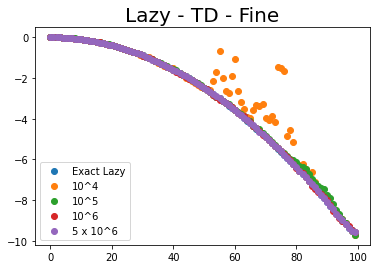

In [16]:
plt.scatter(list(range(100)), y = compute_value(100, 0.9, lazy_policy, 1000), label = "Exact Lazy")
plt.scatter(list(range(100)), y = TD_0(rewards_list4, states_list4, "fine"), label = "10^4")
plt.scatter(list(range(100)), y = TD_0(rewards_list5, states_list5, "fine"), label = "10^5")
plt.scatter(list(range(100)), y = TD_0(rewards_list6, states_list6, "fine"), label = "10^6")
plt.scatter(list(range(100)), y = TD_0(rewards_list7, states_list7, "fine"), label = "5 x 10^6")
plt.legend()
plt.title("Lazy - TD - Fine", size = 20)

##### For TD + Coarse grain LFA:

Text(0.5, 1.0, 'Lazy - TD - Coarse')

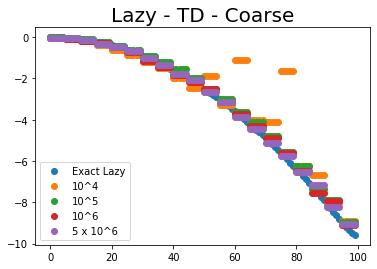

In [17]:
plt.scatter(list(range(100)), y = compute_value(100, 0.9, lazy_policy, 1000), label = "Exact Lazy")
plt.scatter(list(range(100)), y = TD_0(rewards_list4, states_list4, "coarse"), label = "10^4")
plt.scatter(list(range(100)), y = TD_0(rewards_list5, states_list5, "coarse"), label = "10^5")
plt.scatter(list(range(100)), y = TD_0(rewards_list6, states_list6, "coarse"), label = "10^6")
plt.scatter(list(range(100)), y = TD_0(rewards_list7, states_list7, "coarse"), label = "5 x 10^6")
plt.legend()
plt.title("Lazy - TD - Coarse", size = 20)

##### For TD + PWL LFA:

Text(0.5, 1.0, 'Lazy - TD - Piecewise')

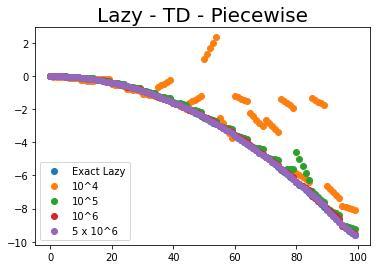

In [18]:
plt.scatter(list(range(100)), y = compute_value(100, 0.9, lazy_policy, 1000), label = "Exact Lazy")
plt.scatter(list(range(100)), y = TD_0(rewards_list4, states_list4, "pwl"), label = "10^4")
plt.scatter(list(range(100)), y = TD_0(rewards_list5, states_list5, "pwl"), label = "10^5")
plt.scatter(list(range(100)), y = TD_0(rewards_list6, states_list6, "pwl"), label = "10^6")
plt.scatter(list(range(100)), y = TD_0(rewards_list7, states_list7, "pwl"), label = "5 x 10^6")
plt.legend()
plt.title("Lazy - TD - Piecewise", size = 20)

##### For LSTD + Fine grain LFA:

Text(0.5, 1.0, 'Lazy - LSTD - Fine')

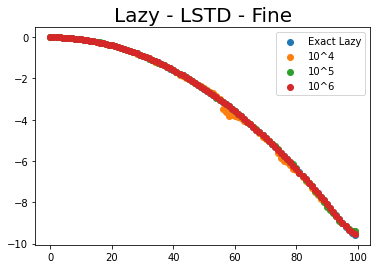

In [19]:
plt.scatter(list(range(100)), y = compute_value(100, 0.9, lazy_policy, 1000), label = "Exact Lazy")
plt.scatter(list(range(100)), y = LSTD(rewards_list4, states_list4, "fine"), label = "10^4")
plt.scatter(list(range(100)), y = LSTD(rewards_list5, states_list5, "fine"), label = "10^5")
plt.scatter(list(range(100)), y = LSTD(rewards_list6, states_list6, "fine"), label = "10^6")
#plt.scatter(list(range(100)), y = LSTD(rewards_list7, states_list7, "fine"), label = "5 x 10^6")
plt.legend()
plt.title("Lazy - LSTD - Fine", size = 20)

##### For LSTD + Coarse grain LFA:

Text(0.5, 1.0, 'Lazy - LSTD - Coarse')

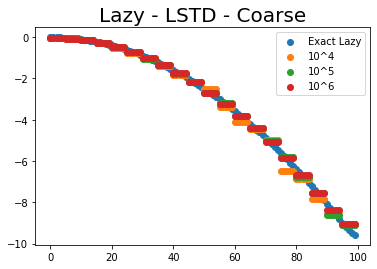

In [20]:
plt.scatter(list(range(100)), y = compute_value(100, 0.9, lazy_policy, 1000), label = "Exact Lazy")
plt.scatter(list(range(100)), y = LSTD(rewards_list4, states_list4, "coarse"), label = "10^4")
plt.scatter(list(range(100)), y = LSTD(rewards_list5, states_list5, "coarse"), label = "10^5")
plt.scatter(list(range(100)), y = LSTD(rewards_list6, states_list6, "coarse"), label = "10^6")
#plt.scatter(list(range(100)), y = LSTD(rewards_list7, states_list7, "coarse"), label = "5 x 10^6")
plt.legend()
plt.title("Lazy - LSTD - Coarse", size = 20)

##### For LSTD + PWL LFA:

Text(0.5, 1.0, 'Lazy - LSTD - Piecewise')

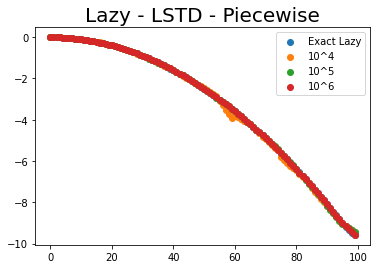

In [21]:
plt.scatter(list(range(100)), y = compute_value(100, 0.9, lazy_policy, 1000), label = "Exact Lazy")
plt.scatter(list(range(100)), y = LSTD(rewards_list4, states_list4, "pwl"), label = "10^4")
plt.scatter(list(range(100)), y = LSTD(rewards_list5, states_list5, "pwl"), label = "10^5")
plt.scatter(list(range(100)), y = LSTD(rewards_list6, states_list6, "pwl"), label = "10^6")
#plt.scatter(list(range(100)), y = LSTD(rewards_list7, states_list7, "pwl"), label = "5 x 10^6")
plt.legend()
plt.title("Lazy - LSTD - Piecewise", size = 20)

#### For aggressive policy:

##### Run the episode:

In [22]:
rewards_list4a, states_list4a = run_episode(aggr_policy, 10**4)
rewards_list5a, states_list5a = run_episode(aggr_policy, 10**5)
rewards_list6a, states_list6a = run_episode(aggr_policy, 10**6)
rewards_list7a, states_list7a = run_episode(aggr_policy, 5 * 10**6)

##### For TD + Fine grain LFA:*

Text(0.5, 1.0, 'Aggressive - TD - Fine')

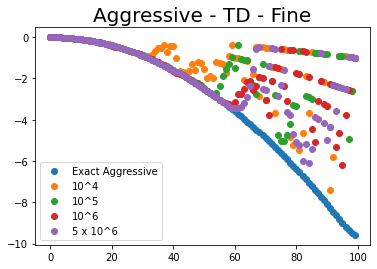

In [23]:
plt.scatter(list(range(100)), y = compute_value(100, 0.9, aggr_policy, 1000), label = "Exact Aggressive")
plt.scatter(list(range(100)), y = TD_0(rewards_list4a, states_list4a, "fine"), label = "10^4")
plt.scatter(list(range(100)), y = TD_0(rewards_list5a, states_list5a, "fine"), label = "10^5")
plt.scatter(list(range(100)), y = TD_0(rewards_list6a, states_list6a, "fine"), label = "10^6")
plt.scatter(list(range(100)), y = TD_0(rewards_list7a, states_list7a, "fine"), label = "5 x 10^6")
plt.legend()
plt.title("Aggressive - TD - Fine", size = 20)

##### For TD + Coarse grain LFA:

Text(0.5, 1.0, 'Aggressive - TD - Coarse')

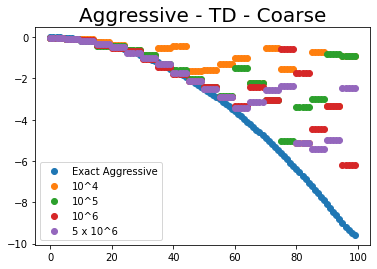

In [24]:
plt.scatter(list(range(100)), y = compute_value(100, 0.9, aggr_policy, 1000), label = "Exact Aggressive")
plt.scatter(list(range(100)), y = TD_0(rewards_list4a, states_list4a, "coarse"), label = "10^4")
plt.scatter(list(range(100)), y = TD_0(rewards_list5a, states_list5a, "coarse"), label = "10^5")
plt.scatter(list(range(100)), y = TD_0(rewards_list6a, states_list6a, "coarse"), label = "10^6")
plt.scatter(list(range(100)), y = TD_0(rewards_list7a, states_list7a, "coarse"), label = "5 x 10^6")
plt.legend()
plt.title("Aggressive - TD - Coarse", size = 20)

##### For TD + PWL LFA:

Text(0.5, 1.0, 'Aggressive - TD - Piecewise')

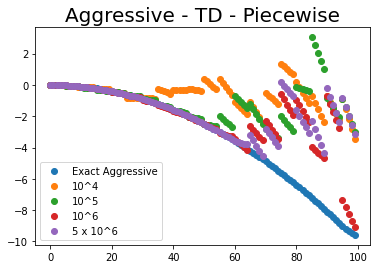

In [25]:
plt.scatter(list(range(100)), y = compute_value(100, 0.9, aggr_policy, 1000), label = "Exact Aggressive")
plt.scatter(list(range(100)), y = TD_0(rewards_list4a, states_list4a, "pwl"), label = "10^4")
plt.scatter(list(range(100)), y = TD_0(rewards_list5a, states_list5a, "pwl"), label = "10^5")
plt.scatter(list(range(100)), y = TD_0(rewards_list6a, states_list6a, "pwl"), label = "10^6")
plt.scatter(list(range(100)), y = TD_0(rewards_list7a, states_list7a, "pwl"), label = "5 x 10^6")
plt.legend()
plt.title("Aggressive - TD - Piecewise", size = 20)

##### For LSTD + Fine grain LFA:

Text(0.5, 1.0, 'Aggressive - LSTD - Fine')

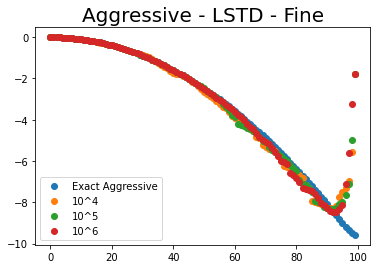

In [26]:
plt.scatter(list(range(100)), y = compute_value(100, 0.9, aggr_policy, 1000), label = "Exact Aggressive")
plt.scatter(list(range(100)), y = LSTD(rewards_list4a, states_list4a, "fine"), label = "10^4")
plt.scatter(list(range(100)), y = LSTD(rewards_list5a, states_list5a, "fine"), label = "10^5")
plt.scatter(list(range(100)), y = LSTD(rewards_list6a, states_list6a, "fine"), label = "10^6")
#plt.scatter(list(range(100)), y = LSTD(rewards_list7a, states_list7a, "fine"), label = "5 x 10^6")
plt.legend()
plt.title("Aggressive - LSTD - Fine", size = 20)

##### For LSTD + Coarse grain LFA:

Text(0.5, 1.0, 'Aggressive - LSTD - Coarse')

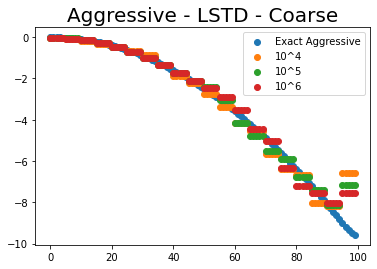

In [27]:
plt.scatter(list(range(100)), y = compute_value(100, 0.9, aggr_policy, 1000), label = "Exact Aggressive")
plt.scatter(list(range(100)), y = LSTD(rewards_list4a, states_list4a, "coarse"), label = "10^4")
plt.scatter(list(range(100)), y = LSTD(rewards_list5a, states_list5a, "coarse"), label = "10^5")
plt.scatter(list(range(100)), y = LSTD(rewards_list6a, states_list6a, "coarse"), label = "10^6")
#plt.scatter(list(range(100)), y = LSTD(rewards_list7a, states_list7a, "coarse"), label = "5 x 10^6")
plt.legend()
plt.title("Aggressive - LSTD - Coarse", size = 20)

##### For LSTD + PWL LFA:

Text(0.5, 1.0, 'Aggressive - LSTD - Piecewise')

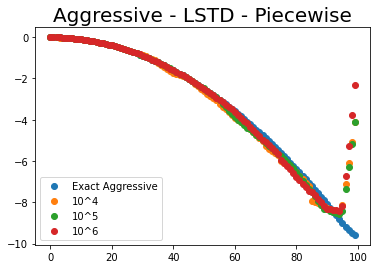

In [28]:
plt.scatter(list(range(100)), y = compute_value(100, 0.9, aggr_policy, 1000), label = "Exact Aggressive")
plt.scatter(list(range(100)), y = LSTD(rewards_list4a, states_list4a, "pwl"), label = "10^4")
plt.scatter(list(range(100)), y = LSTD(rewards_list5a, states_list5a, "pwl"), label = "10^5")
plt.scatter(list(range(100)), y = LSTD(rewards_list6a, states_list6a, "pwl"), label = "10^6")
#plt.scatter(list(range(100)), y = LSTD(rewards_list7a, states_list7a, "pwl"), label = "5 x 10^6")
plt.legend()
plt.title("Aggressive - LSTD - Piecewise", size = 20)

### Conclusions:

- The runtimes associated with the code are a bit long. I removed the case of $10^7$ transitions, and worked with half that ammount. Even so, in some cases, I commented out the code that would offer the results for $5 \times 10^6$ due to computational restrictions. 
- By construction, the probability of shrinking the length of the queue is higher than that associated with an increase in it. By starting at $x_0 = 99$, we make sure the agent is exposed to some data on transitions and rewards for states closer to the maximum length of queue. Nonetheless, in expectation, it will see many more cases for short queues, as opposed to longer ones. This implies that the approximations to the real value vector will do worse for higher values of x; and will be very good for lower values of x.
- This condition is especially true for the case of the aggressive policy, where the objective is to have a few cases of long queues as possible.
- The LSTD approach is much more efficient, in terms of data usage, than the simple TD method, as it converges to the real value of the policies with fewer transitions.
- On the other hand, it requires longer run-times to do so. So there is a trade-off.
- I did not observe significant differences in run-times among the different linea function approximations we employed.


## Problem 2:

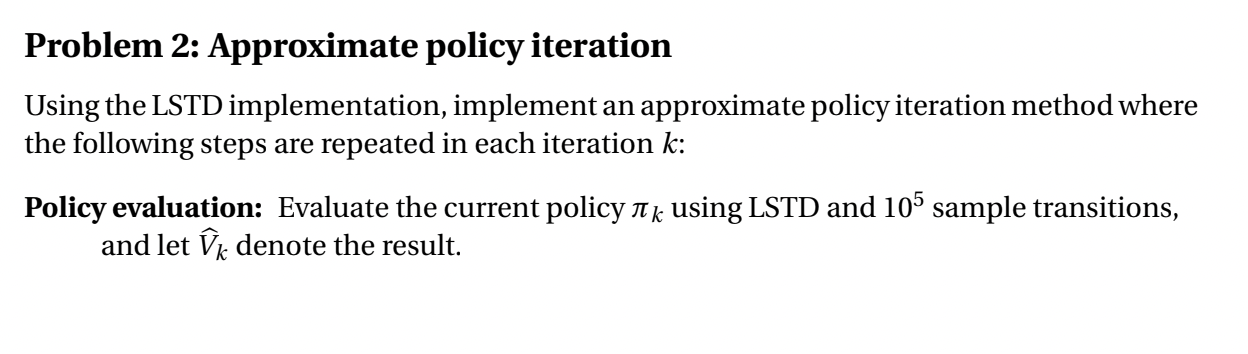

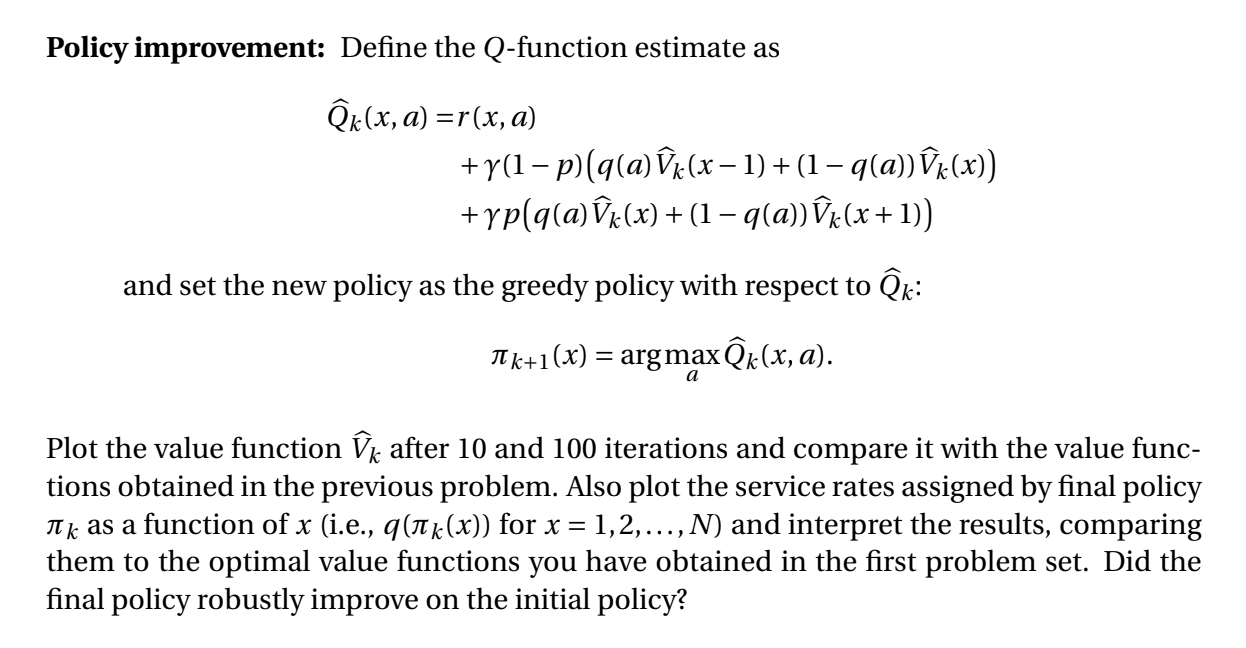

In [31]:
policy_vector = lazy_policy
reward_m = reward_matrix(100)

for k in range(1, 101): 
  
  if k % 10 == 0:
    print(k)

  # run an episode:
  rewards_list, states_list = run_episode(policy_vector, 10**5)
  # run LSTD to get the value - I will use the finer grain:
  value_vector = LSTD(rewards_list, states_list, "fine")
  # compute Qs:
  for state in range(100):
    if state == 0:
      Q_low = reward_m[state, 0] + 0.9 * 0.5 * ((1- 0.51) * value_vector[state]) + 0.9 * 0.5 *(0.51 * value_vector[state] + (1-0.51) * value_vector[state + 1])
      Q_high = reward_m[state, 1] + 0.9 * 0.5 * ((1- 0.6) * value_vector[state]) + 0.9 * 0.5 *(0.6 * value_vector[state] + (1-0.6) * value_vector[state + 1])

    elif state == 99:
      Q_low = reward_m[state, 0] + 0.9 * 0.5 * (0.51 * value_vector[state - 1] + ((1- 0.51) * value_vector[state])) + 0.9 * 0.5 * (0.51 * value_vector[state])
      Q_high = reward_m[state, 1] + 0.9 * 0.5 * (0.6 * value_vector[state - 1] + ((1- 0.6) * value_vector[state])) + 0.9 * 0.5 * (0.6 * value_vector[state])

    else:
      Q_low = reward_m[state, 0] + 0.9 * 0.5 * (0.51 * value_vector[state - 1] + ((1- 0.51) * value_vector[state])) + 0.9 * 0.5 * (0.51 * value_vector[state] + (1-0.51) * value_vector[state + 1])
      Q_high = reward_m[state, 1] + 0.9 * 0.5 * (0.6 * value_vector[state - 1] + ((1- 0.6) * value_vector[state])) + 0.9 * 0.5 * (0.6 * value_vector[state] + (1-0.6) * value_vector[state + 1])

    if Q_low < Q_high:
      policy_vector[state] = 1

  if k == 1:
    policy_vec10 = policy_vector
    value_vec10 = value_vector
  elif k == 100:
    policy_vec100 = policy_vector
    value_vec100 = value_vector



10
20
30
40
50
60
70
80
90
100


### Results:

These are the value functions obtained in the previous problem:

Text(0.5, 1.0, 'Lazy - LSTD - Fine')

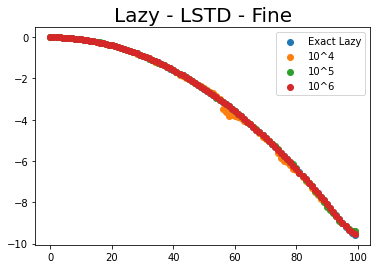

In [32]:
plt.scatter(list(range(100)), y = compute_value(100, 0.9, lazy_policy, 1000), label = "Exact Lazy")
plt.scatter(list(range(100)), y = LSTD(rewards_list4, states_list4, "fine"), label = "10^4")
plt.scatter(list(range(100)), y = LSTD(rewards_list5, states_list5, "fine"), label = "10^5")
plt.scatter(list(range(100)), y = LSTD(rewards_list6, states_list6, "fine"), label = "10^6")
#plt.scatter(list(range(100)), y = LSTD(rewards_list7, states_list7, "fine"), label = "5 x 10^6")
plt.legend()
plt.title("Lazy - LSTD - Fine", size = 20)

These are the value functions obtained with the Approximate Policy Iteration algorithm at $k = 10$ and $k = 100$, compared to the exact value function of the lazy policy, and to its approximation using $10^4$ transitions:



Text(0.5, 1.0, 'Lazy and API - LSTD - Fine')

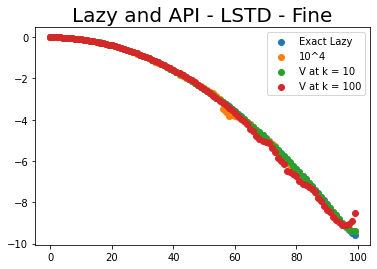

In [33]:
plt.scatter(list(range(100)), y = compute_value(100, 0.9, lazy_policy, 1000), label = "Exact Lazy")
plt.scatter(list(range(100)), y = LSTD(rewards_list4, states_list4, "fine"), label = "10^4")
plt.scatter(list(range(100)), y = value_vec10, label = "V at k = 10")
plt.scatter(list(range(100)), y = value_vec100, label = "V at k = 100")
plt.legend()
plt.title("Lazy and API - LSTD - Fine", size = 20)

This is how the policies look:

In [44]:
_, optimal_policy = policy_iteration(100, 100, 0.9, P, 100)
optimal_policy = plotable(optimal_policy, 0.4)
aggr_policy = aggr_policy + np.ones(100) * 0.1
policy_vec10 = policy_vec10 + np.ones(100) * 0.2
policy_vec100 = policy_vec100 + np.ones(100) * 0.3

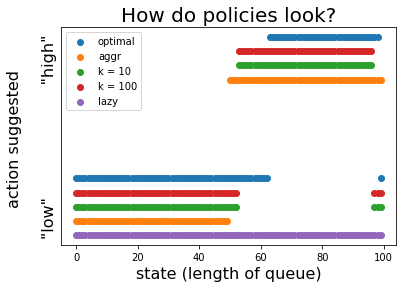

In [45]:
for policy, label in [(optimal_policy,"optimal"), (aggr_policy, "aggr"), (policy_vec10, "k = 10"), (policy_vec100, "k = 100"), (np.zeros(100), "lazy")]:
  plt.scatter(list(range(len(policy))), y = policy, label = label)

plt.xlabel('state (length of queue)', fontsize = 16)
plt.ylabel('action suggested \n \n"low"                      "high"', fontsize = 16)
plt.title("How do policies look?", fontsize = 20)
plt.yticks([])
plt.legend()

### Conclusions:

- The Approximate Policy Iteration method proposed in the prompt, which uses LSTD for the evaluation step, offers mixed results:
  - It does improve on the lazy policy, setting the action to high service rate in some pertinent cases.
  - Nonetheless, it does not find the optimal policy.
  - No additional improvement was offered after $k = 10$, being the policies suggested at that point and at $k = 100$ exactly the same (and not optimal).

- This can be explained, as in problem 1, due to the our agents "lack of experience" in terms of states, rewards and transitions for higher lengths of queue. This is particularly apparent in the Value plot, where the approximated value functions diverge from the exact one for $x > 50$.

- It's clear that the TD and LSTD are rather slow algorithms having very high computational complexities. Even for this case, which considers only 100 states.

